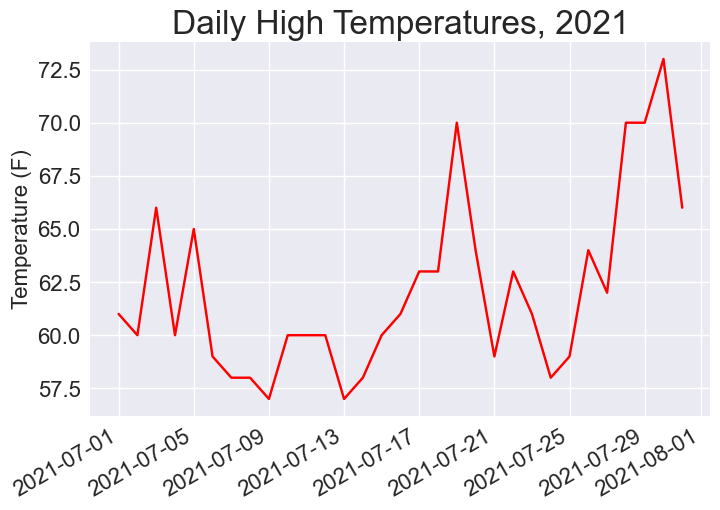

In [ ]:
from pathlib import Path
import csv
from datetime import datetime

import matplotlib.pyplot as plt


path = Path(r'C:\Users\xtrab\Desktop\weather_data\sitka_weather_07-2021_simple.csv') #full filepath
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# Extract dates and high temperatures.
dates, highs = [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    dates.append(current_date)
    highs.append(high)

# Plot the high temperatures.
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red')

# Format plot.
ax.set_title("Daily High Temperatures, 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

# This Python notebook is part of Eric Matthes' Python Crash Course book:

# Matthes, E. (2022). Python crash course: A hands-on, project-based introduction to programming (3rd ed.). No Starch Press.

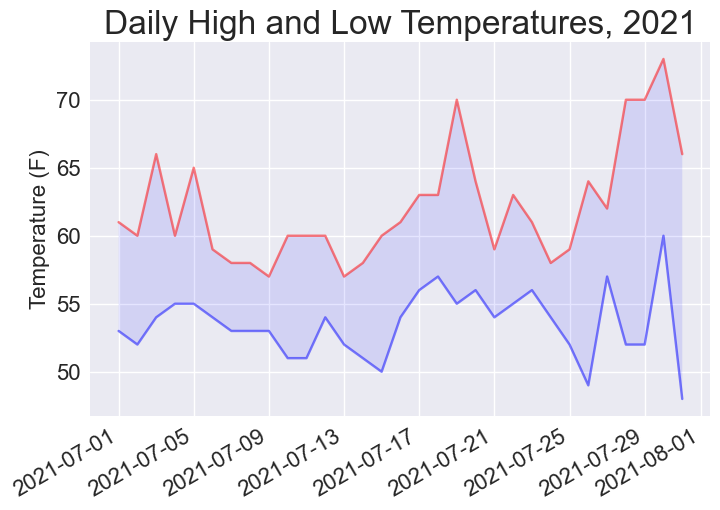

In [ ]:
from pathlib import Path
import csv
from datetime import datetime

import matplotlib.pyplot as plt


path = Path(r'C:\Users\xtrab\Desktop\weather_data\sitka_weather_07-2021_simple.csv') #full filepath
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# Extract dates, and high and low temperatures.
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    high = int(row[4])
    low = int(row[5])
    dates.append(current_date)
    highs.append(high)
    lows.append(low)

# Plot the high and low temperatures.
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red', alpha=0.5)
ax.plot(dates, lows, color='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Format plot.
ax.set_title("Daily High and Low Temperatures, 2021", fontsize=24)
ax.set_xlabel('', fontsize=16)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

# This Python notebook is part of Eric Matthes' Python Crash Course book:

# Matthes, E. (2022). Python crash course: A hands-on, project-based introduction to programming (3rd ed.). No Starch Press.

Missing data for 2021-05-04 00:00:00


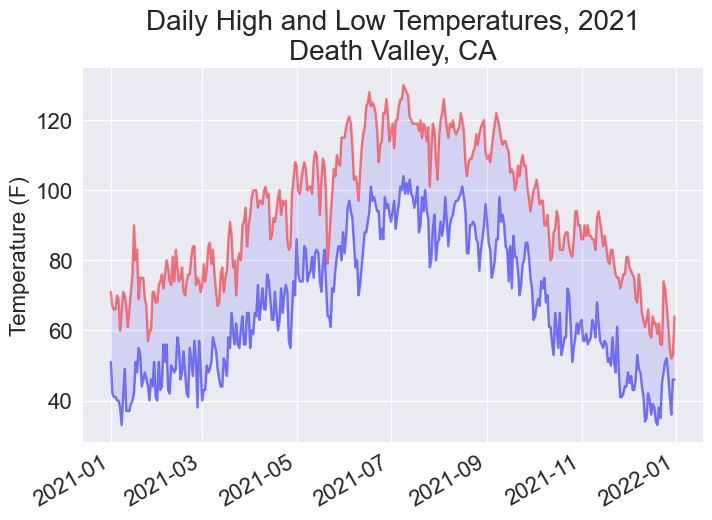

In [ ]:
from pathlib import Path
import csv
from datetime import datetime

import matplotlib.pyplot as plt


path = Path(r'C:\Users\xtrab\Desktop\weather_data\death_valley_2021_simple.csv') #full filepath
lines = path.read_text().splitlines()

reader = csv.reader(lines)
header_row = next(reader)

# Extract dates, and high and low temperatures.
dates, highs, lows = [], [], []
for row in reader:
    current_date = datetime.strptime(row[2], '%Y-%m-%d')
    try:
        high = int(row[3])
        low = int(row[4])
    except ValueError:
        print(f"Missing data for {current_date}")
    else:
        dates.append(current_date)
        highs.append(high)
        lows.append(low)

# Plot the high and low temperatures.
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots()
ax.plot(dates, highs, color='red', alpha=0.5)
ax.plot(dates, lows, color='blue', alpha=0.5)
ax.fill_between(dates, highs, lows, facecolor='blue', alpha=0.1)

# Format plot.
title = "Daily High and Low Temperatures, 2021\nDeath Valley, CA"
ax.set_title(title, fontsize=20)
fig.autofmt_xdate()
ax.set_ylabel("Temperature (F)", fontsize=16)
ax.tick_params(labelsize=16)

plt.show()

# This Python notebook is part of Eric Matthes' Python Crash Course book:

# Matthes, E. (2022). Python crash course: A hands-on, project-based introduction to programming (3rd ed.). No Starch Press.

In [ ]:
from pathlib import Path
import json


# Read data as a string and convert to a Python object.
path = Path(r'C:\Users\xtrab\Downloads\pcc_3e-main\pcc_3e-main\chapter_16\mapping_global_datasets\eq_data\eq_data_1_day_m1.geojson')
contents = path.read_text(encoding='utf-8')
all_eq_data = json.loads(contents)

# Examine all earthquakes in the dataset.
all_eq_dicts = all_eq_data['features']

mags, lons, lats = [], [], []
for eq_dict in all_eq_dicts:
    mag = eq_dict['properties']['mag']
    lon = eq_dict['geometry']['coordinates'][0]
    lat = eq_dict['geometry']['coordinates'][1]
    mags.append(mag)
    lons.append(lon)
    lats.append(lat)

print(mags[:10])
print(lons[:5])
print(lats[:5])

# This Python notebook is part of Eric Matthes' Python Crash Course book:

# Matthes, E. (2022). Python crash course: A hands-on, project-based introduction to programming (3rd ed.). No Starch Press.

[1.6, 1.6, 2.2, 3.7, 2.92000008, 1.4, 4.6, 4.5, 1.9, 1.8]
[-150.7585, -153.4716, -148.7531, -159.6267, -155.248336791992]
[61.7591, 59.3152, 63.1633, 54.5612, 18.7551670074463]


In [2]:
from pathlib import Path
import json

import plotly.express as px


# Read data as a string and convert to a Python object.
path = Path(r'C:\Users\xtrab\Downloads\pcc_3e-main\pcc_3e-main\chapter_16\mapping_global_datasets\eq_data\eq_data_1_day_m1.geojson')
contents = path.read_text(encoding='utf-8')
all_eq_data = json.loads(contents)

# Examine all earthquakes in the dataset.
all_eq_dicts = all_eq_data['features']

mags, lons, lats, eq_titles = [], [], [], []
for eq_dict in all_eq_dicts:
    mag = eq_dict['properties']['mag']
    lon = eq_dict['geometry']['coordinates'][0]
    lat = eq_dict['geometry']['coordinates'][1]
    eq_title = eq_dict['properties']['title']
    mags.append(mag)
    lons.append(lon)
    lats.append(lat)
    eq_titles.append(eq_title)

title = 'Global Earthquakes'
fig = px.scatter_geo(lat=lats, lon=lons, size=mags, title=title,
        color=mags,
        color_continuous_scale='Magma', #color scale from dark blue to yellow
        #others include -> magma, plasma, rocket, turbo, inferno, cividis, mako, viridis
        labels={'color':'Magnitude'},
        projection='natural earth',
        hover_name=eq_titles,
    )
fig.show()

# This Python notebook is part of Eric Matthes' Python Crash Course book:

# Matthes, E. (2022). Python crash course: A hands-on, project-based introduction to programming (3rd ed.). No Starch Press.